# Read image.

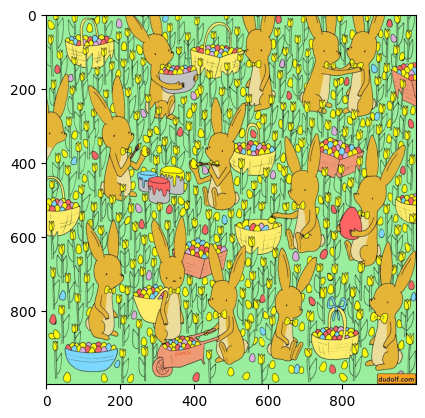

In [27]:
# Import libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image.
img = cv2.imread('rabbit.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Preprocessing pipeline.

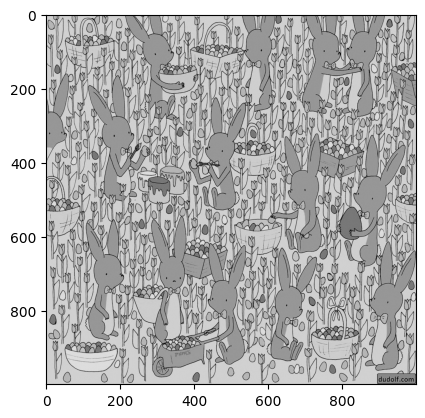

In [28]:
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

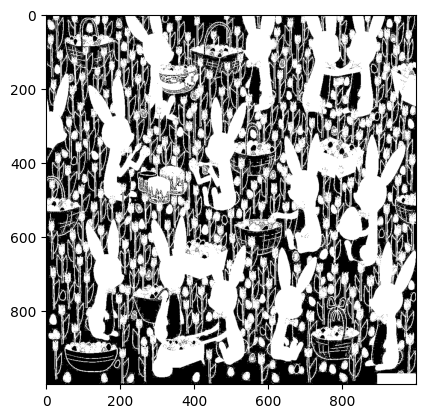

In [29]:
# Thresholding to create binary image, highlight rabbits.
_, open = cv2.threshold(gray, 195, 255, cv2.THRESH_BINARY_INV)
plt.imshow(open, cmap='gray')
plt.show()

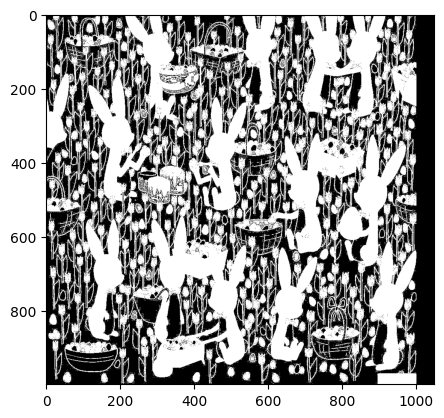

In [30]:
# Pad left due to template choice.
open = cv2.copyMakeBorder(open, 0, 0, 0, 50, cv2.BORDER_CONSTANT, value=[0, 0, 0])
plt.imshow(open, cmap='gray')
plt.show()

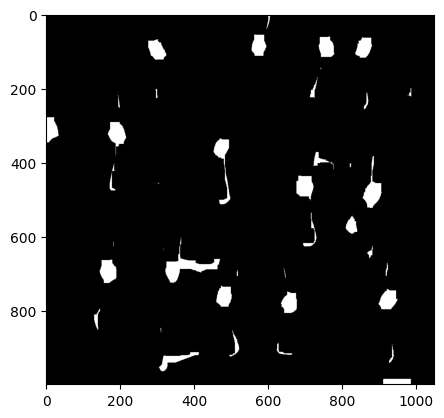

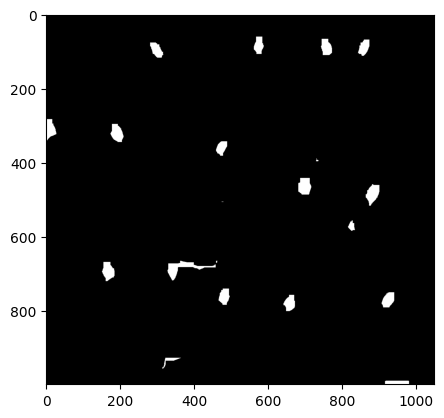

In [31]:
# Erode big regions
# including rabbit body and flowers.
erode_body = np.ones((30, 30), np.uint8)
open = cv2.erode(open, erode_body, iterations=1)
plt.imshow(open, cmap='gray')
plt.show()

# Erode remaining noises.
erode_noise = np.ones((11, 11), np.uint8)
open = cv2.erode(open, erode_noise, iterations=1)
plt.imshow(open, cmap='gray')
plt.show()

# Template matching.

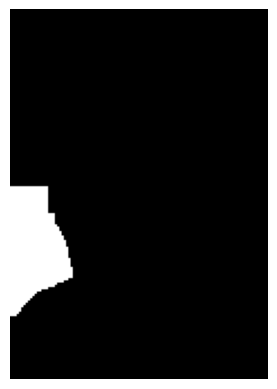

(1000, 1050)
(165, 115)


In [32]:
# Extract template - left cropped rabbit.
template = open[205:370, 0:115]
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()
print(open.shape)
print(template.shape)

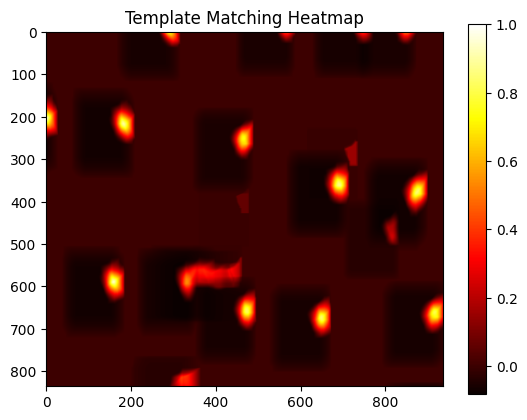

In [33]:
result = cv2.matchTemplate(open, template, cv2.TM_CCOEFF_NORMED) # Template matching
plt.imshow(result, cmap='hot')
plt.colorbar() # Shows the scale
plt.title('Template Matching Heatmap')
plt.show()

# Create bounding boxes and print result.

Detected rabbits: 14


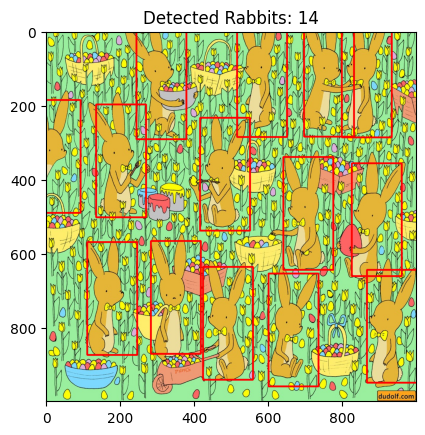

In [34]:
threshold = 0.42 # Tuned to get accurate result.
locations = np.where(result >= threshold)

rectangles = []
w, h = template.shape[::-1]

# Create rectangles for each detected area.
for pt in zip(*locations[::-1]):
    rect = [int(pt[0]), int(pt[1]), int(w), int(h)]
    rectangles.append(rect)
    rectangles.append(rect)  # Add twice for groupRectangles().

# Group overlapping rectangles (Non-Maximum Suppression).
rectangles, weights = cv2.groupRectangles(rectangles, groupThreshold=7, eps=0.1)

# Draw boxes and count.
for (x, y, w, h) in rectangles:
    cv2.rectangle(img, (x - 50, y - 20), (x + w - 30, y + h + 120), (255, 0, 0), 4) # (-50,-20,-30,+120): Alignment for visually accurate boxes.
count = len(rectangles)
print(f"Detected rabbits: {count}")


plt.imshow(img)
plt.title(f'Detected Rabbits: {count}')
plt.show()